In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
url1 = 'https://raw.githubusercontent.com/nzxtdata/Auto-MPG-Data-Set/main/auto-mpg.csv'
auto = pd.read_csv(url1)


In [ ]:
auto

,mpg,cylinders,displacement,hp,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
hp              0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
auto['hp'] = auto['hp'].replace('?', np.NaN).astype('float64')

In [ ]:
auto.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   hp            392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


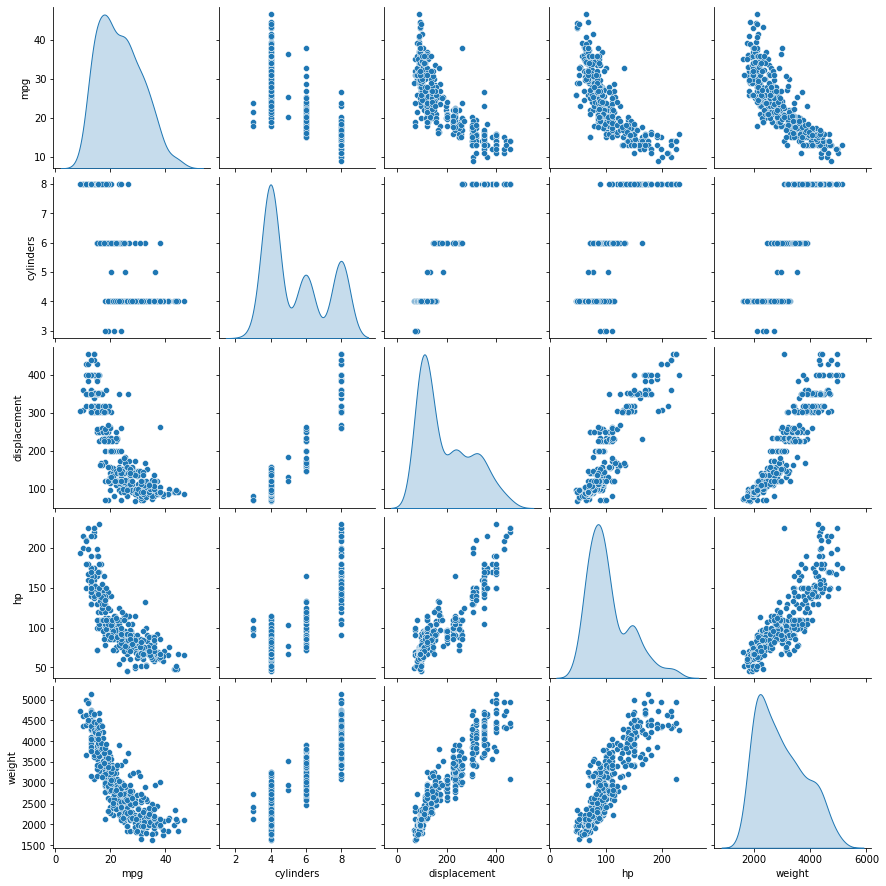

In [ ]:
sns.pairplot(auto[["mpg", "cylinders", "displacement","hp", "weight"]], diag_kind="kde")

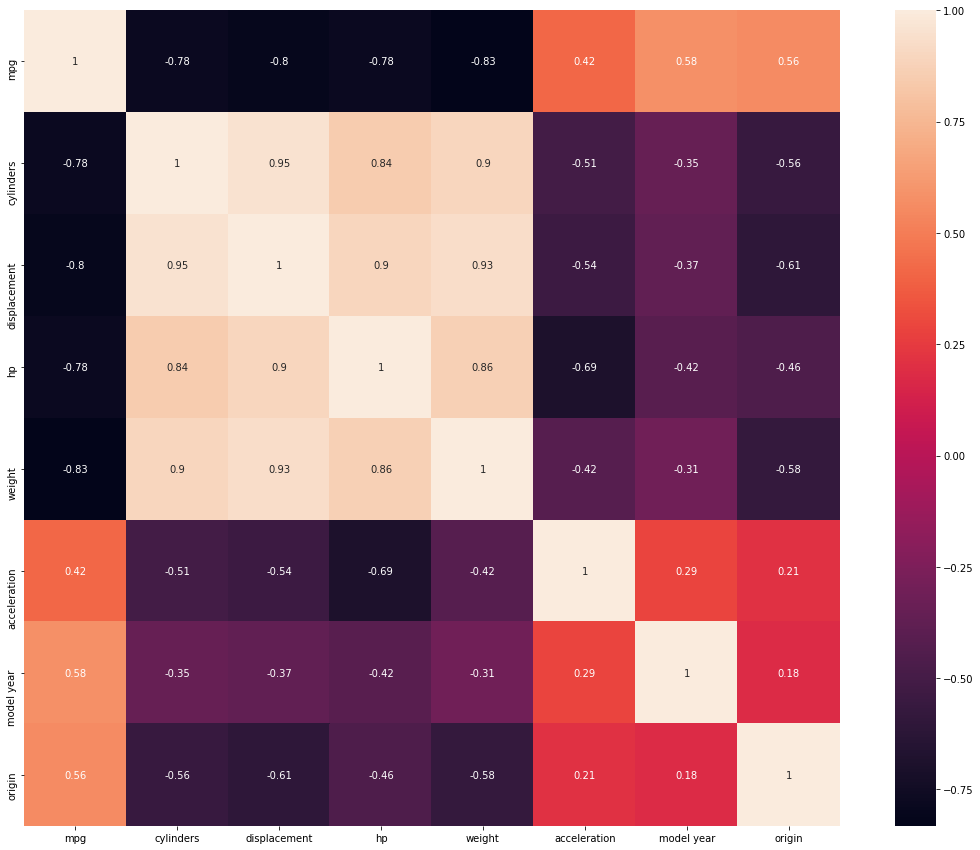

In [ ]:
plt.subplots(figsize=(20,15))
corr = auto.corr()
sns.heatmap(corr,square=True, annot=True)

In [ ]:
auto['Country_code'] = auto.origin.replace([1,2,3],['USA','Europe','Japan'])


In [ ]:
auto.tail(20)


,mpg,cylinders,displacement,hp,weight,acceleration,model year,origin,name,Country_code
378,38.0,4,105.0,63.0,2125,14.7,82,1,plymouth horizon miser,USA
379,36.0,4,98.0,70.0,2125,17.3,82,1,mercury lynx l,USA
380,36.0,4,120.0,88.0,2160,14.5,82,3,nissan stanza xe,Japan
381,36.0,4,107.0,75.0,2205,14.5,82,3,honda accord,Japan
382,34.0,4,108.0,70.0,2245,16.9,82,3,toyota corolla,Japan
383,38.0,4,91.0,67.0,1965,15.0,82,3,honda civic,Japan
384,32.0,4,91.0,67.0,1965,15.7,82,3,honda civic (auto),Japan
385,38.0,4,91.0,67.0,1995,16.2,82,3,datsun 310 gx,Japan
386,25.0,6,181.0,110.0,2945,16.4,82,1,buick century limited,USA
387,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),USA


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


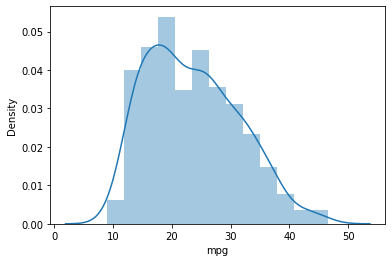

In [ ]:
sns.distplot(auto['mpg'])

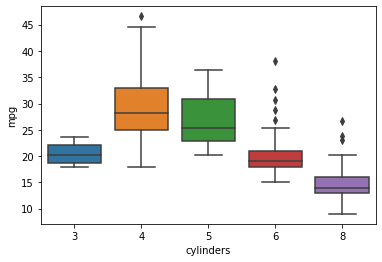

In [ ]:
sns.boxplot(x="cylinders", y="mpg", data=auto)

In [ ]:
X = auto.drop(['mpg',"name","Country_code"], axis = 1)
y = auto['mpg']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [ ]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())


In [ ]:
res=reg.fit(X_train,y_train)


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print(reg.score(X_test,y_test))

0.8075601682255903


In [118]:
cdf = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficients'])
print(cdf)

              Coefficients
cylinders        -0.477213
displacement      0.020168
hp               -0.017769
weight           -0.006514
acceleration      0.046109
model year        0.747109
origin            1.397758
